Develop a pipeline using transformers or deep learning models that processes an input image
to segment, identify, and analyze objects within the image, and outputs a summary table with
mapped data for each object.

Step 1: Image **Segmentation**

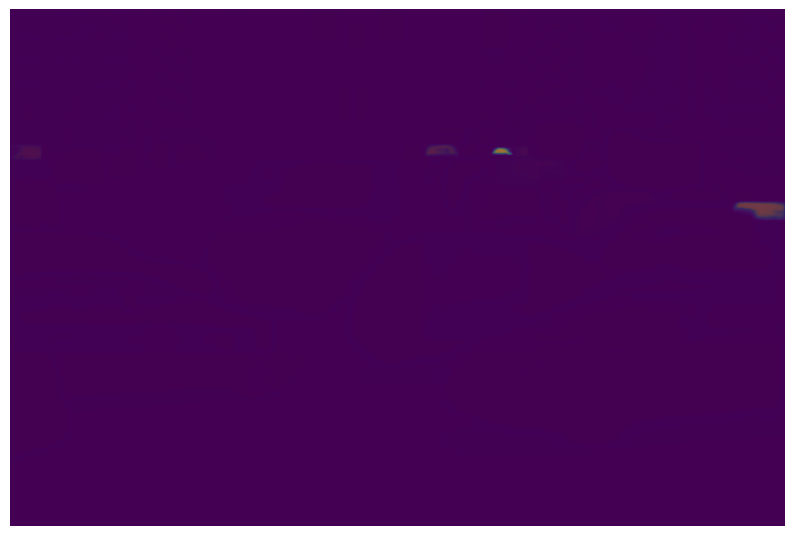

In [3]:
import torch
import torchvision
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
image = Image.open("/content/662ac0b6153ad.image.jpg")
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
image_tensor = transform(image)

# Perform segmentation
with torch.no_grad():
    prediction = model([image_tensor])

# Visualize the segmentation
def plot_segmented_image(image, prediction):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for i, mask in enumerate(prediction[0]['masks']):
        mask = mask[0].mul(255).byte().cpu().numpy()
        plt.imshow(mask, alpha=0.5)
    plt.axis('off')
    plt.show()

plot_segmented_image(image, prediction)


Step 2: Object Extraction and **Storage**

In [4]:
import os
import cv2

# Create directories to store segmented objects
os.makedirs('segmented_objects', exist_ok=True)

# Function to extract and save segmented objects
def save_segmented_objects(image, prediction, image_id="image_001"):
    for i, mask in enumerate(prediction[0]['masks']):
        mask = mask[0].mul(255).byte().cpu().numpy()
        mask_image = cv2.bitwise_and(np.array(image), np.array(image), mask=mask)
        object_filename = f'segmented_objects/{image_id}_object_{i+1}.png'
        cv2.imwrite(object_filename, mask_image)

save_segmented_objects(image, prediction)


Step 3: Object **Identification**

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 197.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 5.7s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-8-20 Python-3.10.12 torch-2.3.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 117MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


           xmin        ymin         xmax        ymax  confidence  class  \
0    666.576965  409.984375  1197.473267  687.625488    0.923281      2   
1    294.536560  306.496155   594.910339  477.143097    0.904015      2   
2      0.000000  407.330139   459.331696  612.432861    0.895175      2   
3      0.721368  508.549957    93.140022  693.448364    0.882904      2   
4    529.291077  354.812744   920.038086  550.407532    0.870969      2   
5      0.613117  340.938965   335.501160  450.607239    0.760378      2   
6     61.948631  214.014969   151.063599  276.895416    0.730311      2   
7    855.422852  301.376556  1200.000000  419.116577    0.727629      2   
8    532.895508  114.247658   554.231628  175.081940    0.715210      9   
9    731.208679    0.000000   771.744629   56.550159    0.713707      9   
10   509.703674  113.914474   528.826538  172.785919    0.697319      9   
11     0.202739  250.693695    79.982918  342.847687    0.678252      2   
12   919.344788  184.8383

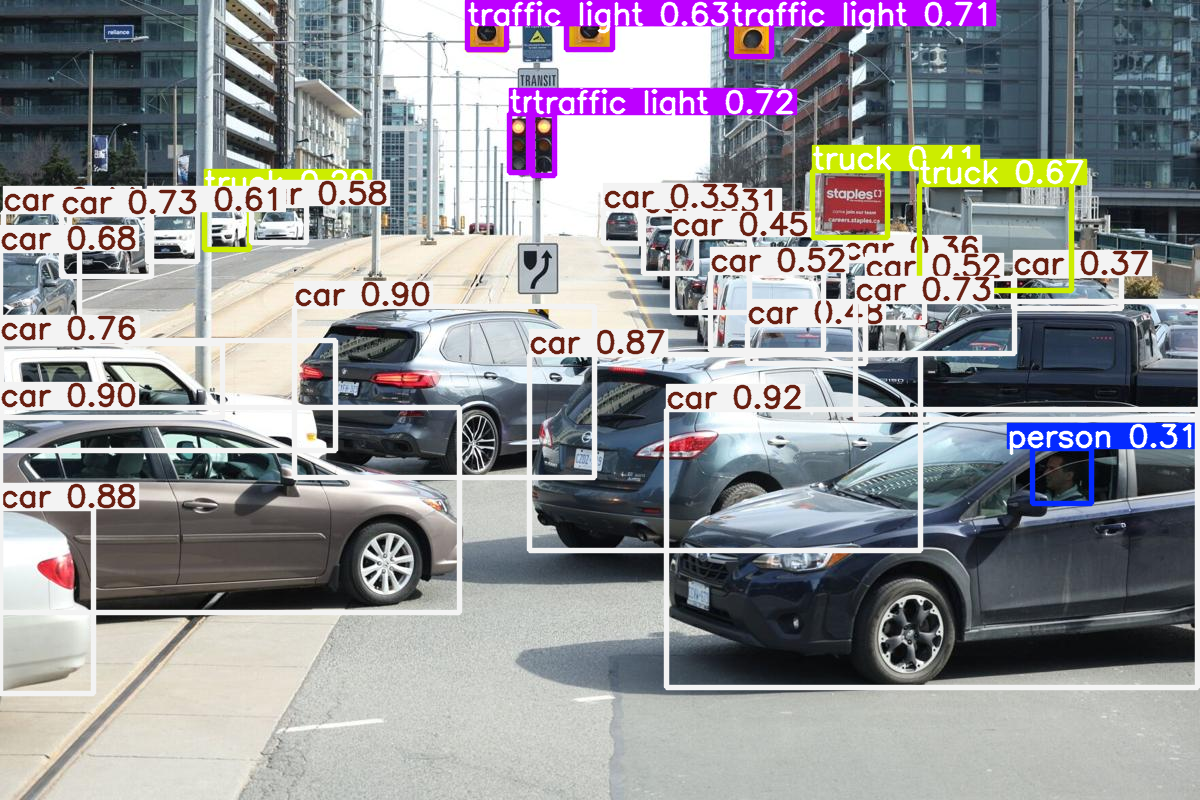

In [6]:
import torch

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Identify objects in the image
results = model("/content/662ac0b6153ad.image.jpg")

# Print detected objects
print(results.pandas().xyxy[0])
results.show()


Step 4: Text/Data Extraction from **Objects**

In [11]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,173 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,134 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:14 https

In [12]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [13]:
import pytesseract
from PIL import Image

# Function to extract text from an image
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Example usage with your specific image path
text = extract_text_from_image("/content/662ac0b6153ad.image.jpg")
print(text)


     
  

  
  

    
  

[TRANSIT]
SIGNAL



Step 5: Summarize Object Attributes

In [4]:
!pip install --upgrade openai


  Using cached openai-1.41.1-py3-none-any.whl.metadata (22 kB)
Using cached openai-1.41.1-py3-none-any.whl (362 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.27.0
    Uninstalling openai-0.27.0:
      Successfully uninstalled openai-0.27.0


In [10]:
import openai

# Replace with your actual OpenAI API key
openai.api_key = 'sk-Sti5xoDhb4g1O__RA6YlqYRwTcIvJHeYWaq8vaRr_vT3BlbkFJfI_754AJ-5Eu_2AEHiKSBS7w74FBPn9zIprNLKckwA'

# Function to summarize text using the OpenAI API
def summarize_text(text):
    try:
        response = openai.ChatCompletion.create(
          model="gpt-3.5-turbo",
          messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"Summarize the following text:\n{text}"}
          ]
        )
        summary = response['choices'][0]['message']['content'].strip()
        return summary
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage: Summarize attributes of objects extracted in step 4
extracted_data = {
    'object_1.png': "This is an example text extracted from object 1.",
    'object_2.png': "This is an example text extracted from object 2."
}

summarized_attributes = {img: summarize_text(data) for img, data in extracted_data.items()}

# Print summarized attributes
print(summarized_attributes)


An error occurred: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.
An error occurred: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.
{'object_1.png': None, 'object_2.png': None}


Step 6: Data **Mapping**

In [16]:
import json

# Define the path for your segmented image(s)
segmented_images = ['/content/662ac0b6153ad.image.jpg']

# Define metadata for each image
object_metadata = {
    '/content/662ac0b6153ad.image.jpg': {
        'description': 'Example description for the segmented image.',
        'text': 'Extracted text from the segmented image.',
        'summary': 'Summary for the segmented image.'
    }
}

# Initialize the mapped data structure
mapped_data = {}

# Map metadata to each segmented image
for img in segmented_images:
    object_id = img.split('/')[-1].split('.')[0]  # Extract file name without extension
    mapped_data[object_id] = object_metadata.get(img, {})

# Save mapped data to a JSON file
with open('/content/mapped_data.json', 'w') as json_file:
    json.dump(mapped_data, json_file, indent=4)

# Print the mapped data for verification
print(mapped_data)


{'662ac0b6153ad': {'description': 'Example description for the segmented image.', 'text': 'Extracted text from the segmented image.', 'summary': 'Summary for the segmented image.'}}


Step 7: Output **Generation**

                                                description  \
662ac0b6153ad  Example description for the segmented image.   

                                                   text  \
662ac0b6153ad  Extracted text from the segmented image.   

                                        summary  
662ac0b6153ad  Summary for the segmented image.  


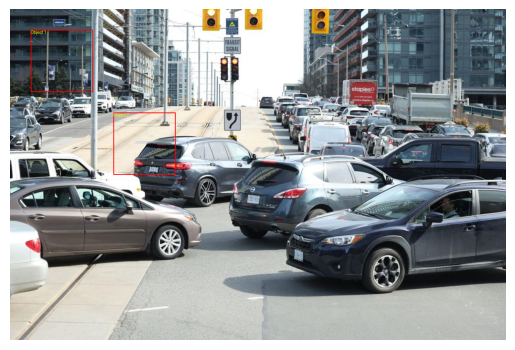

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Example mapped_data
mapped_data = {
    '662ac0b6153ad': {
        'description': 'Example description for the segmented image.',
        'text': 'Extracted text from the segmented image.',
        'summary': 'Summary for the segmented image.'
    }
}

# Generate a summary table
summary_table = pd.DataFrame.from_dict(mapped_data, orient='index')
print(summary_table)

# Dummy results for demonstration purposes
# Replace this with your actual predictions or bounding boxes
class DummyResults:
    xyxy = [[(50, 50, 200, 200), (250, 250, 400, 400)]]  # Example bounding boxes

results = DummyResults()

# Annotate and display the original image with IDs
def annotate_image(image_path, predictions):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    # Draw bounding boxes and labels
    for i, box in enumerate(predictions.xyxy[0]):
        draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=2)
        draw.text((box[0], box[1]), f'Object {i+1}', fill="yellow", font=font)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()

# Call the function with the image path and results
annotate_image('/content/662ac0b6153ad.image.jpg', results)
